In [55]:
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
np.set_printoptions(precision=3)
#%matplotlib inline


## a)

In [78]:
#Define the Matrix & Parameters
Delta = 0
Omega = 5
Gamma_phi = 0
Gamma = 1
Omega2 = 1/5
Gamma_S = Gamma/2 + Gamma_phi
M = np.array([[-Gamma_S, Delta, 0], [-Delta, -Gamma_S, -Omega], [0, Omega, -Gamma ]])
M2 = np.array([[-Gamma_S, Delta, 0], [-Delta, -Gamma_S, -Omega2], [0, Omega2, -Gamma ]])
print(M)
R = np.array([0, 0, Gamma])

[[-0.5  0.   0. ]
 [ 0.  -0.5 -5. ]
 [ 0.   5.  -1. ]]


In [79]:
#define the Differntial equation
def Bloch_eq(t, y):
    return M @ y - R

def Bloch_eq2(t, y):
    return M2 @ y - R

In [80]:
#define the initial conditons
y0 = np.array([0,0,-1])

In [81]:
#define the time span
t_eval = np.linspace(0, 50, 300)

In [82]:
#Solve the diff eq
bloch = solve_ivp(Bloch_eq, (0,50), y0, t_eval=t_eval)
bloch2 = solve_ivp(Bloch_eq2, (0,50), y0, t_eval=t_eval)
#print(bloch)

<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:6: SyntaxWarning: invalid escape sequence '\O'
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/3478680454.py:6: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Bloch vector components for $\Omega$/$\Delta$=5  ')


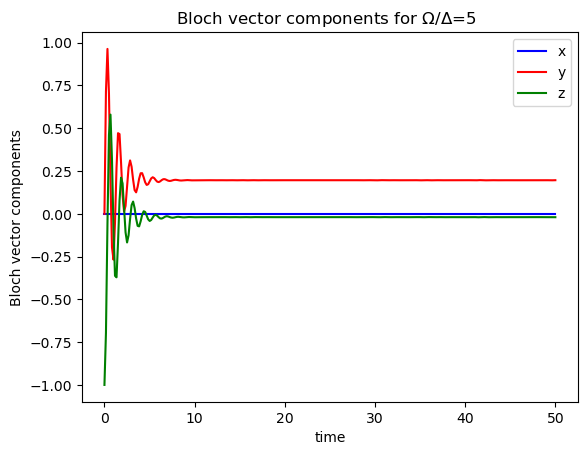

In [83]:
plt.plot(bloch.t, bloch.y[0], color='blue', label='x')
plt.plot(bloch.t, bloch.y[1], color='red', label='y')
plt.plot(bloch.t, bloch.y[2], color='green', label='z')
plt.xlabel('time')
plt.ylabel('State Variables')
plt.title('Bloch vector components for $\Omega$/$\Delta$=5  ')
plt.legend()
plt.xlabel("time")
plt.ylabel("Bloch vector components")
#plt.grid()
plt.show()


Now again, but for different Parameter values

<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:6: SyntaxWarning: invalid escape sequence '\O'
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2473346677.py:6: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Bloch vector components for $\Omega$/$\Delta$=0.2  ')


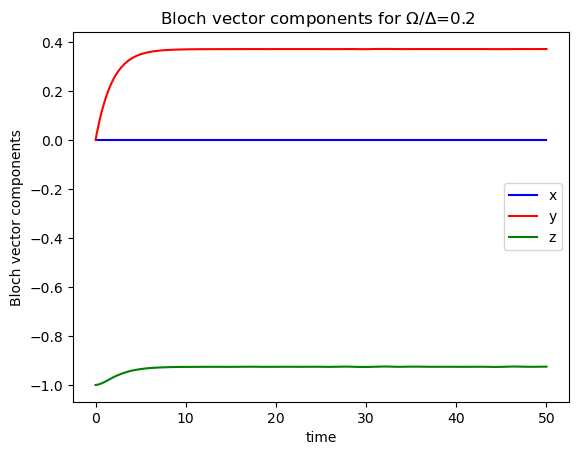

In [ ]:
plt.plot(bloch2.t, bloch2.y[0], color='blue', label='x')
plt.plot(bloch2.t, bloch2.y[1], color='red', label='y')
plt.plot(bloch2.t, bloch2.y[2], color='green', label='z')
plt.xlabel('time')
plt.title('Bloch vector components for $\Omega$/$\Delta$=0.2  ')
plt.legend()
plt.ylabel("Bloch vector components")
#plt.grid()
plt.show()


## b)

In [ ]:
#getting the Bloch vector and the population for big times
bloch_infty = bloch.y.T[45]
#print(bloch_infty)
pop_inft = (1+bloch_infty[2])/2
#print(pop_infty)


0.4902643671195509


<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2387021600.py:24: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel(' $ \Delta $ / $ \Gamma $')
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2387021600.py:26: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Excited state population for diff. $ \Delta $ / $ \Gamma $ (varying $ \Gamma $ )')
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2387021600.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


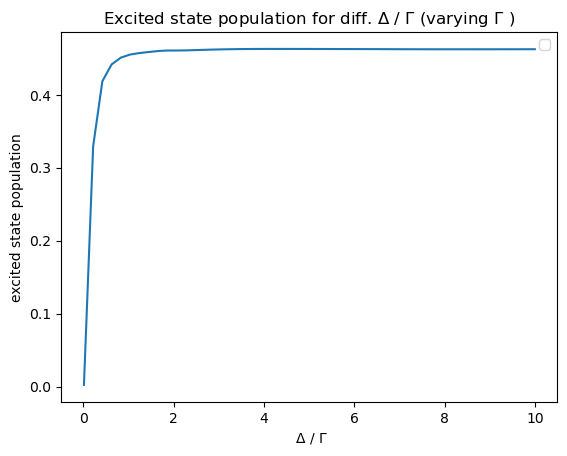

In [113]:
#plotting the populations for omega << gamma
pop_infty = []
for i in np.linspace(0.01,10,50):
    Omega = 5
    Gamma_phi = 0
    #Gamma = 0.7
    Delta = 1
    Gamma = Delta/i
    Gamma_S = Gamma/2 + Gamma_phi
    #Delta = Gamma * i
    M = np.array([[-Gamma_S, Delta, 0], [-Delta, -Gamma_S, -Omega], [0, Omega, -Gamma ]])
    R = np.array([0, 0, Gamma])
    y0 = np.array([0,0,-1])
    t_eval = np.linspace(0, 200, 300)
    bloch = solve_ivp(Bloch_eq, (0,200), y0, t_eval=t_eval)
    bloch_infty = bloch.y.T[180]
    pop_inft = (1+bloch_infty[2])/2
    pop_infty.append(pop_inft)
x = np.linspace(0.01, 10, 50)
#print(x)
#print("now popinfty")
#print(pop_infty)
plt.plot(x, pop_infty)
plt.xlabel(' $ \Delta $ / $ \Gamma $')
plt.ylabel('State Variables')
plt.title('Excited state population for diff. $ \Delta $ / $ \Gamma $ (varying $ \Gamma $ )')
plt.legend()
plt.ylabel("excited state population")
#plt.grid()
plt.show()


    
    

<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2461922241.py:23: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel(' $ \Delta $ / $ \Gamma $')
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2461922241.py:25: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Excited state population for diff. $ \Delta $ / $ \Gamma $  (varying $ \Delta $) ')
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2461922241.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


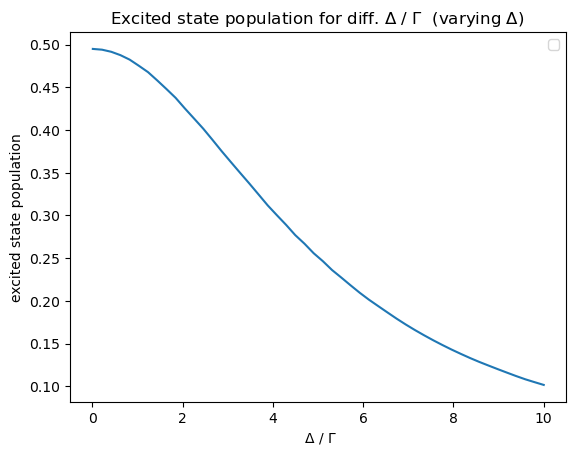

In [112]:
pop_infty = []
for i in np.linspace(0.01,10,50):
    Omega = 5
    Gamma_phi = 0
    Gamma = 0.7
    #Delta = 1
    #Gamma = Delta/i
    Gamma_S = Gamma/2 + Gamma_phi
    Delta = Gamma * i
    M = np.array([[-Gamma_S, Delta, 0], [-Delta, -Gamma_S, -Omega], [0, Omega, -Gamma ]])
    R = np.array([0, 0, Gamma])
    y0 = np.array([0,0,-1])
    t_eval = np.linspace(0, 200, 300)
    bloch = solve_ivp(Bloch_eq, (0,200), y0, t_eval=t_eval)
    bloch_infty = bloch.y.T[180]
    pop_inft = (1+bloch_infty[2])/2
    pop_infty.append(pop_inft)
x = np.linspace(0.01, 10, 50)
#print(x)
#print("now popinfty")
#print(pop_infty)
plt.plot(x, pop_infty)
plt.xlabel(' $ \Delta $ / $ \Gamma $')
plt.ylabel('State Variables')
plt.title('Excited state population for diff. $ \Delta $ / $ \Gamma $  (varying $ \Delta $) ')
plt.legend()
plt.ylabel("excited state population")
#plt.grid()
plt.show()


we can see here, that the plots look very different depending on what we choose to vary in the calculations, which makes a lot of sense. For large detunings, our excited state obviously gets much less populated in the first place

### second part: recovering the results from the lecture

<>:15: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\O'
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2765977179.py:15: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Population for $\Omega$>$\Gamma$ ')


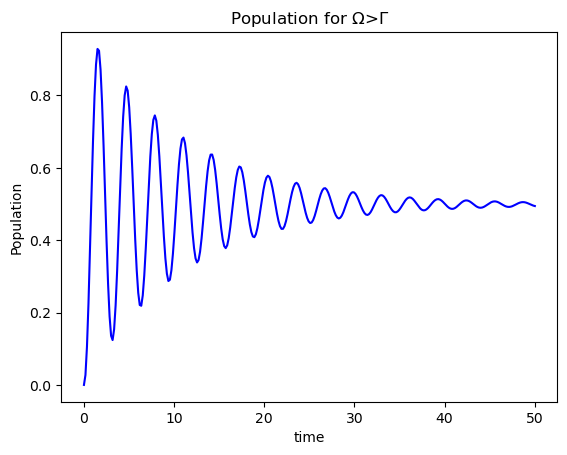

In [126]:
Omega = 5
Gamma_phi = 0
Gamma = 0.3
Gamma_S = Gamma/2 + Gamma_phi
Delta = 0
M = np.array([[-Gamma_S, Delta, 0], [-Delta, -Gamma_S, -Omega], [0, Omega, -Gamma ]])
R = np.array([0, 0, Gamma])
y0 = np.array([0,0,-1])
t_eval = np.linspace(0, 20, 300)
bloch = solve_ivp(Bloch_eq, (0,200), y0, t_eval=t_eval)
z = bloch.y[2]
pop = (1+z)/2
plt.plot(bloch2.t, pop, color='blue', label='x')
plt.xlabel('time')
plt.title('Population for $\Omega$>$\Gamma$ ')
plt.ylabel("Population")
#plt.grid()
plt.show()
#print(pop)

<>:15: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\O'
/var/folders/sh/psslqy096z1___j776j6zlrc0000gn/T/ipykernel_7913/2504713011.py:15: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Population for $\Omega$<$\Gamma$ ')


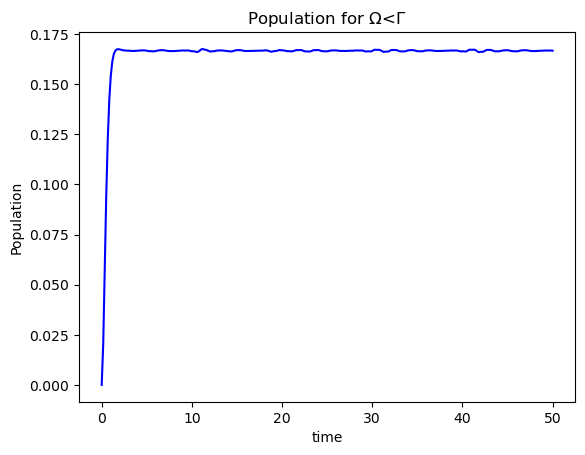

In [132]:
Omega = 5
Gamma_phi = 0
Gamma = 10
Gamma_S = Gamma/2 + Gamma_phi
Delta = 0
M = np.array([[-Gamma_S, Delta, 0], [-Delta, -Gamma_S, -Omega], [0, Omega, -Gamma ]])
R = np.array([0, 0, Gamma])
y0 = np.array([0,0,-1])
t_eval = np.linspace(0, 20, 300)
bloch = solve_ivp(Bloch_eq, (0,200), y0, t_eval=t_eval)
z = bloch.y[2]
pop = (1+z)/2
plt.plot(bloch2.t, pop, color='blue', label='x')
plt.xlabel('time')
plt.title('Population for $\Omega$<$\Gamma$ ')
plt.ylabel("Population")
#plt.grid()
plt.show()